___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
# 1-Import Libraies

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
%matplotlib notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.compose import make_column_transformer

#Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


#Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#!pip install termcolor
from termcolor import colored
import missingno as msno 

# !pip3 install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

In [2]:
## Useful Functions

###############################################################################

def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

###############################################################################

# Load Dataset

In [3]:
df0 = pd.read_csv("Mall_Customers.csv")
df = df0.copy()

# Explore Data

You can rename columns to more usable, if you need.

In [4]:
# 2-Load|Read Data
with pd.option_context('display.max_columns', None):
    dataset_path = "Mall_Customers.csv"
    df0 = pd.read_csv(dataset_path)
    df = df0.copy() 
    first_looking(df)
    duplicate_values(df)
    drop_columns(df,[])
    drop_null(df, 90)
    # df.head()
    # df.tail()
    # df.sample(5)
    # df.describe().T
    # df.describe(include=object).T

Shape:(200, 5)
There is 200 observation and 5 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
-------------------------------------------------------------------------------
Number of Uniques:
CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64
----------------------------------------------------------

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [5]:
df.head()

,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.sample(5)

,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
128,129,Male,59,71,11
121,122,Female,38,67,40
56,57,Female,51,44,50
153,154,Female,38,78,76
103,104,Male,26,62,55


In [8]:
df.drop("customerid", axis = 1, inplace=True)

In [9]:
df.head(2)

,gender,age,annual_income_(k$),spending_score_(1-100)
0,Male,19,15,39
1,Male,21,15,81


In [10]:
import plotly.figure_factory as ff

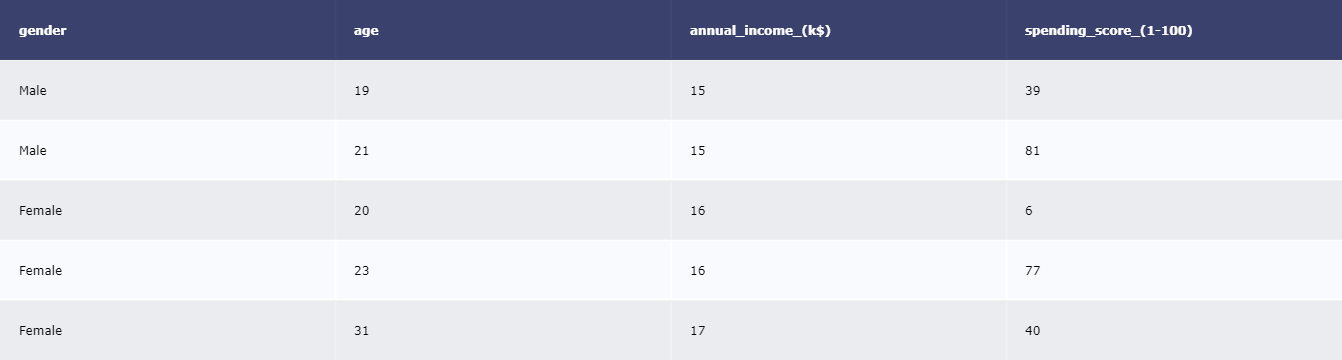

In [23]:
dat = ff.create_table(df.head())
dat

In [12]:
# to find how many unique values object features have
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"{col} has {df[col].nunique()} unique value")

age has 51 unique value
annual_income_(k$) has 64 unique value
spending_score_(1-100) has 84 unique value


In [24]:
%matplotlib inline

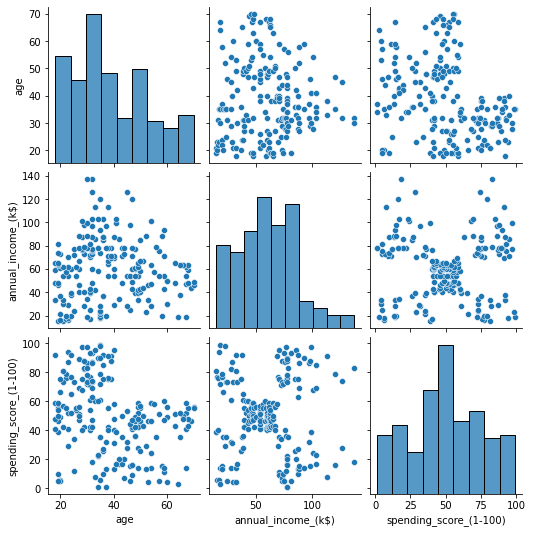

In [21]:
sns.pairplot(df);

In [25]:
sns.pairplot(df, palette="inferno", hue="annual_income_(k$)", corner=True);

<IPython.core.display.Javascript object>

In [17]:
sns.pairplot(df, palette="inferno", hue="spending_score_(1-100)", corner=True);

<IPython.core.display.Javascript object>

In [ ]:
for column in df.columns:
    plt.figure(figsize = (20, 6))
    sns.barplot(y = df[column], x = df.index, data = df)
    plt.xticks(rotation = 90);

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

#### *ii. Determine optimal number of clusters*

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

#### *ii. Determine optimal number of clusters*

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

#### ii. *Apply Agglomerative Clustering*

#### iii. *Visualizing and Labeling All the Clusters* 

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___